# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [9]:
import tensorflow as tf

tf.get_logger().setLevel('ERROR')
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.10.1


# Task 2: The Dataset
### Import MNIST

In [10]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


### Shapes of Imported Arrays

In [12]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plot an Image Example

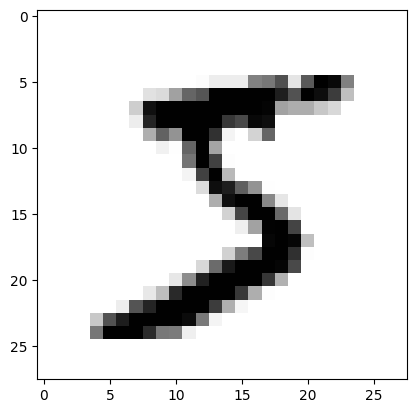

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')

### Display Labels

In [16]:
y_train[0]

5

In [17]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [18]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [19]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Display Encoded Labels

In [22]:
y_test_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [23]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)


x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


### Display Pixel Values

In [24]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [27]:
x_mean = np.mean(x_test_reshaped)
x_std = np.std(x_test_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


### Display Normalized Pixel Values

In [28]:
print(set(x_train_norm[0]))

{0.38155659531965136, 1.1646571517069024, 1.2909636930596848, 1.7835592043355364, 1.6698833171180323, 2.794011535157796, 2.69296630207557, 1.1772878058421807, 1.720405933659145, 2.7687502268872395, 2.4150919110994487, 2.6298130313991788, 2.7182276103461263, 0.027898279531860533, 1.7330365877944234, 1.2404410765185718, 0.11631285847880825, 0.7478455652427205, 2.4656145276405614, 1.97301901636471, -0.19945349490314787, 0.15420482088464296, 2.3393079862877793, 1.5940993923063627, 0.06579024193769527, 0.6089083697546598, -0.11103891595620015, 1.4677928509535803, 2.579290414858066, -0.42680526933815627, 0.2805113622374254, -0.24997611144426085, 0.4573405201313208, -0.28786807385009555, 1.2151797682480154, 2.074064249446936, 0.5962777156193815, 0.01526762539658229, 1.3288556554655195, 2.18774013666444, 0.19209678329047772, 1.0762425727599547, 2.4277225652347267, 1.9351270539588754, 1.4425315426830239, -0.1236695700914784, 0.26788070810214715, -0.3889133069323215, 0.7604762193779987, 0.406817

# Task 6: Creating a Model
### Creating the Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(128, activation = 'relu', input_shape=(784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')          
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [30]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


 Enable GPU as the physical device

In [32]:
tf.config.list_physical_devices('GPU')

tf.test.is_gpu_available()

True

# Task 7: Training the Model

### Training the Model

In [36]:
model.fit(x_train_norm, y_train_encoded, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9912
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9924
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9934
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9943
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0217 - accuracy: 0.9949
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9959
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0177 - accuracy: 0.9967
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9972
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0148 - accuracy: 0.9975
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

### Evaluating the Model

In [37]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy: ', accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9770
Test set accuracy:  97.69999980926514


# Task 8: Predictions

### Predictions on Test Set

In [39]:
preds = model.predict(x_test_norm)
print("Shape of preds: ", preds.shape)

313/313 [==============================] - 1s 2ms/step
Shape of preds:  (10000, 10)


### Plotting the Results

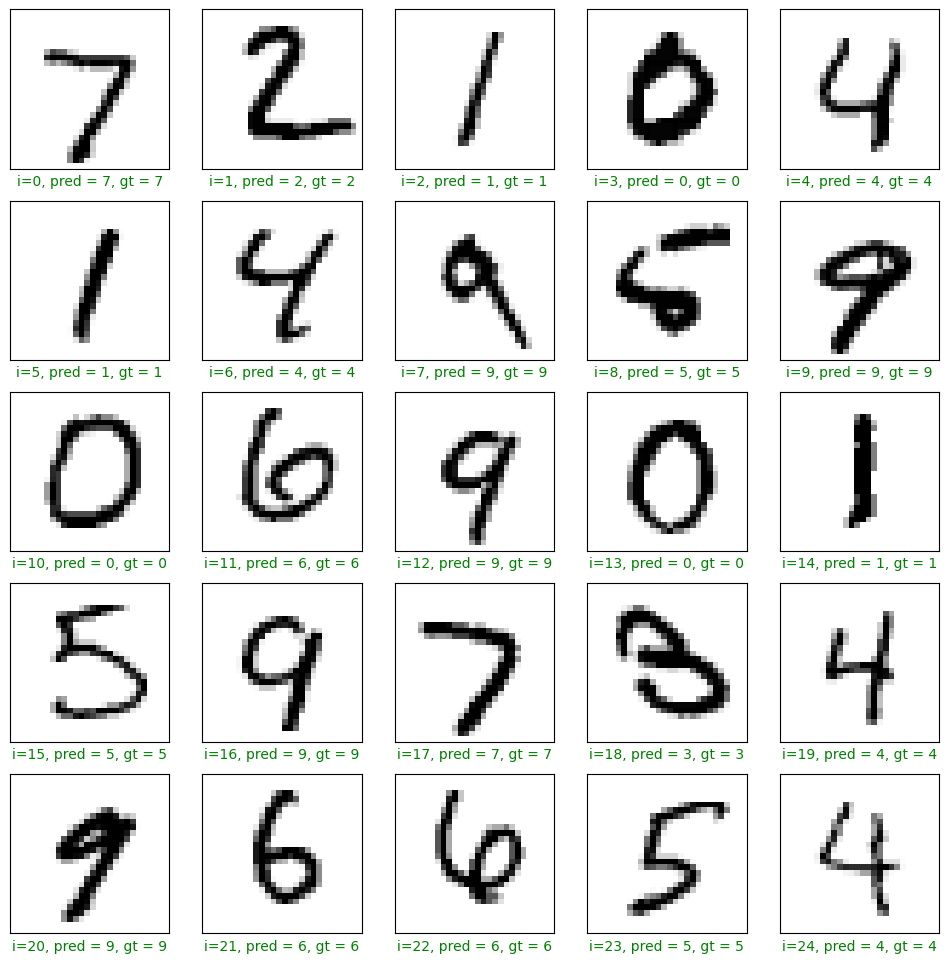

In [41]:
plt.figure(figsize=(12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]

    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel('i={}, pred = {}, gt = {}'.format(start_index+i, pred, gt), color = col)
    plt.imshow(x_test[start_index+i], cmap = 'binary')

plt.show()



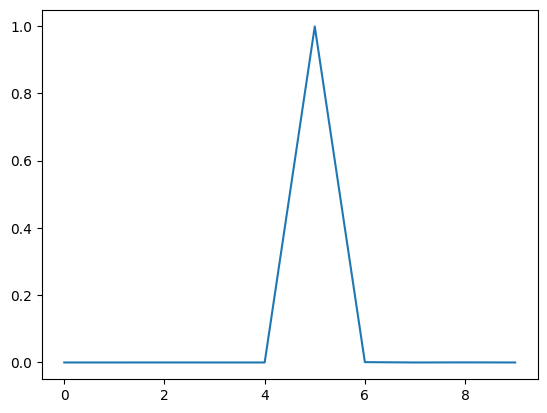

In [42]:
plt.plot(preds[8])
plt.show()